In [2]:
from google.colab import files
uploaded = files.upload()


Saving Iris.csv.zip to Iris.csv.zip


In [4]:
import zipfile
import io

# Unzip the uploaded file
zip_file = zipfile.ZipFile(io.BytesIO(uploaded['Iris.csv.zip']), 'r')
zip_file.extractall()

# Load the CSV into a pandas DataFrame
df = pd.read_csv('Iris.csv')

In [5]:
# Drop 'Id' column if present
if 'Id' in df.columns:
    df.drop('Id', axis=1, inplace=True)


In [6]:
# Split into features and target
X = df.drop('Species', axis=1)
y = df['Species']


In [7]:
from sklearn.preprocessing import StandardScaler

# Initialize the scaler
scaler = StandardScaler()

# Fit and transform the features
X_normalized = scaler.fit_transform(X)

# Optional: Convert back to DataFrame for visualization
X_normalized_df = pd.DataFrame(X_normalized, columns=X.columns)

# Display the first few normalized rows
print(X_normalized_df.head())


   SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
0      -0.900681      1.032057      -1.341272     -1.312977
1      -1.143017     -0.124958      -1.341272     -1.312977
2      -1.385353      0.337848      -1.398138     -1.312977
3      -1.506521      0.106445      -1.284407     -1.312977
4      -1.021849      1.263460      -1.341272     -1.312977


In [8]:
from sklearn.model_selection import train_test_split

# Split into 80% train and 20% test
X_train, X_test, y_train, y_test = train_test_split(
    X_normalized, y, test_size=0.2, random_state=42, stratify=y
)


In [9]:
from sklearn.neighbors import KNeighborsClassifier

# Create the classifier with default K=5
knn = KNeighborsClassifier(n_neighbors=5)

# Fit the classifier to the training data
knn.fit(X_train, y_train)


KNeighborsClassifier()

In [10]:
# Predict on the test set
y_pred = knn.predict(X_test)


In [11]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Detailed classification report
print("Classification Report:\n", classification_report(y_test, y_pred))

# Confusion matrix
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


Accuracy: 0.9333333333333333
Classification Report:
                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       0.83      1.00      0.91        10
 Iris-virginica       1.00      0.80      0.89        10

       accuracy                           0.93        30
      macro avg       0.94      0.93      0.93        30
   weighted avg       0.94      0.93      0.93        30

Confusion Matrix:
 [[10  0  0]
 [ 0 10  0]
 [ 0  2  8]]


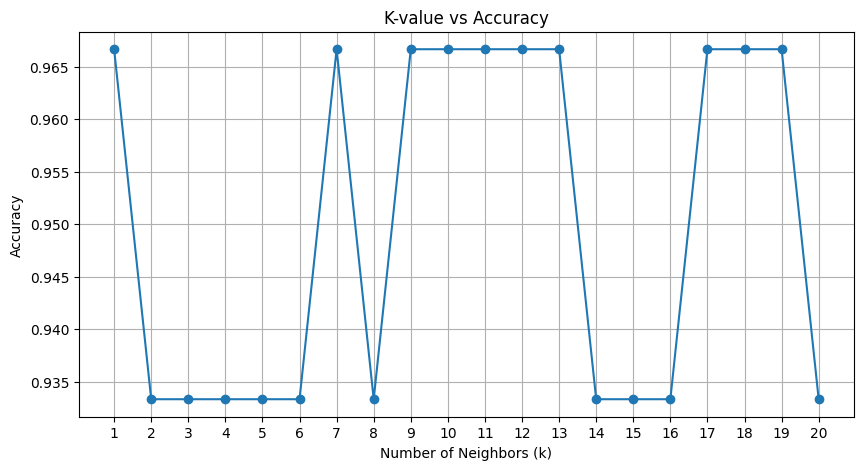

In [12]:
import matplotlib.pyplot as plt

# Test different values of k
k_values = range(1, 21)
accuracies = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    acc = knn.score(X_test, y_test)
    accuracies.append(acc)

# Plotting
plt.figure(figsize=(10, 5))
plt.plot(k_values, accuracies, marker='o')
plt.title('K-value vs Accuracy')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Accuracy')
plt.xticks(k_values)
plt.grid(True)
plt.show()


In [13]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# Range of k values to test
k_range = range(1, 21)
accuracies = []

# Loop through k values
for k in k_range:
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(X_train, y_train)
    y_pred_k = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred_k)
    accuracies.append(acc)


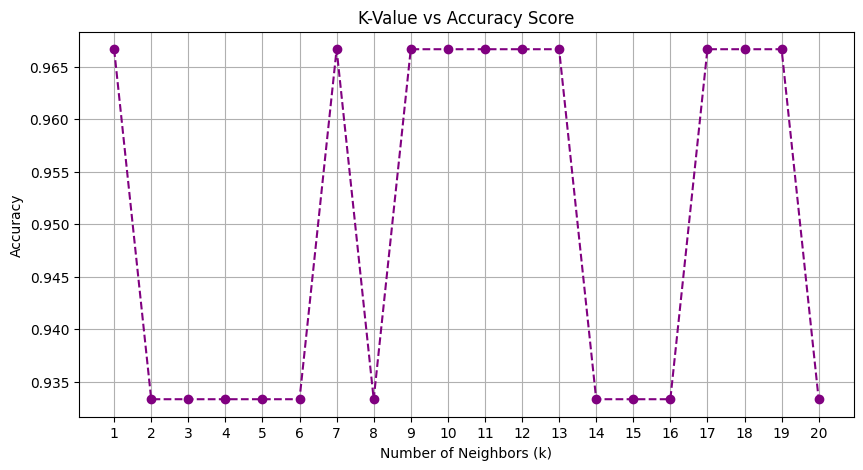

In [14]:
# Plotting the results
plt.figure(figsize=(10, 5))
plt.plot(k_range, accuracies, marker='o', linestyle='--', color='purple')
plt.title('K-Value vs Accuracy Score')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Accuracy')
plt.xticks(k_range)
plt.grid(True)
plt.show()


In [15]:
# Best accuracy and its corresponding k
best_k = k_range[accuracies.index(max(accuracies))]
best_accuracy = max(accuracies)

print(f"Best K value: {best_k} with accuracy: {best_accuracy:.2f}")


Best K value: 1 with accuracy: 0.97


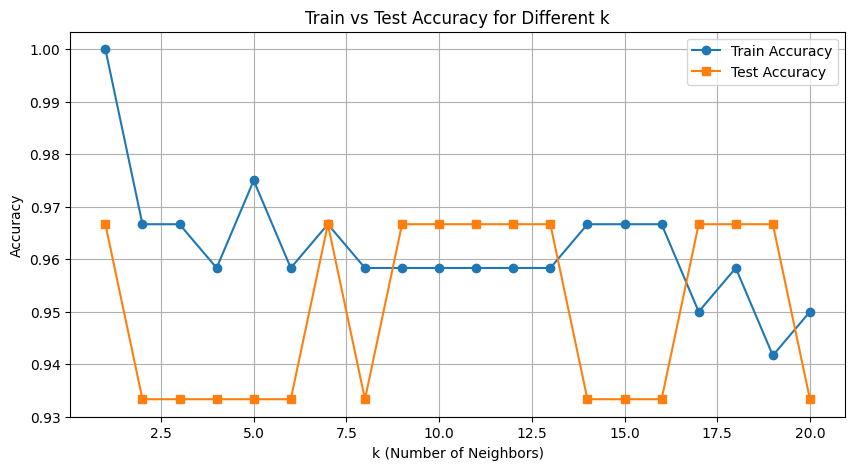

In [16]:
train_accuracies = []
test_accuracies = []

for k in k_range:
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(X_train, y_train)
    train_accuracies.append(model.score(X_train, y_train))
    test_accuracies.append(model.score(X_test, y_test))

# Plot both train and test accuracies
plt.figure(figsize=(10, 5))
plt.plot(k_range, train_accuracies, label='Train Accuracy', marker='o')
plt.plot(k_range, test_accuracies, label='Test Accuracy', marker='s')
plt.title('Train vs Test Accuracy for Different k')
plt.xlabel('k (Number of Neighbors)')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()


In [17]:
from sklearn.neighbors import KNeighborsClassifier

# Train model using best k value
final_knn = KNeighborsClassifier(n_neighbors=best_k)
final_knn.fit(X_train, y_train)

# Make predictions
y_pred = final_knn.predict(X_test)


In [18]:
from sklearn.metrics import accuracy_score

# Evaluate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.2f}")


Model Accuracy: 0.97


In [19]:
from sklearn.metrics import confusion_matrix, classification_report

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)

# Classification report
print("Classification Report:\n", classification_report(y_test, y_pred))


Confusion Matrix:
 [[10  0  0]
 [ 0 10  0]
 [ 0  1  9]]
Classification Report:
                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       0.91      1.00      0.95        10
 Iris-virginica       1.00      0.90      0.95        10

       accuracy                           0.97        30
      macro avg       0.97      0.97      0.97        30
   weighted avg       0.97      0.97      0.97        30



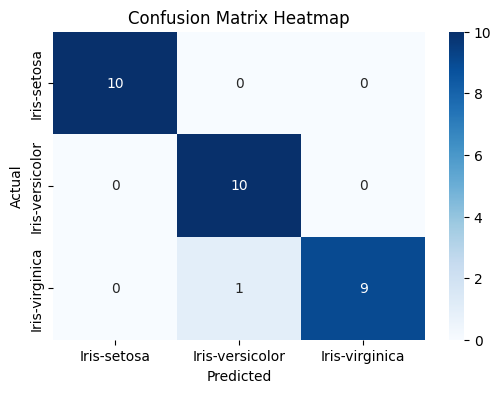

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=final_knn.classes_,
            yticklabels=final_knn.classes_)
plt.title('Confusion Matrix Heatmap')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


In [21]:
import numpy as np

# Calculate per-class accuracy
class_accuracy = conf_matrix.diagonal() / conf_matrix.sum(axis=1)
for label, score in zip(final_knn.classes_, class_accuracy):
    print(f"Accuracy for class '{label}': {score:.2f}")


Accuracy for class 'Iris-setosa': 1.00
Accuracy for class 'Iris-versicolor': 1.00
Accuracy for class 'Iris-virginica': 0.90


In [22]:
from sklearn.decomposition import PCA

# Reduce X_normalized to 2 principal components
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_normalized)

# Create new train-test split on reduced data
X_pca_train, X_pca_test, y_pca_train, y_pca_test = train_test_split(
    X_pca, y, test_size=0.2, random_state=42, stratify=y
)


In [23]:
# Train KNN using best_k
knn_pca = KNeighborsClassifier(n_neighbors=best_k)
knn_pca.fit(X_pca_train, y_pca_train)


KNeighborsClassifier(n_neighbors=1)

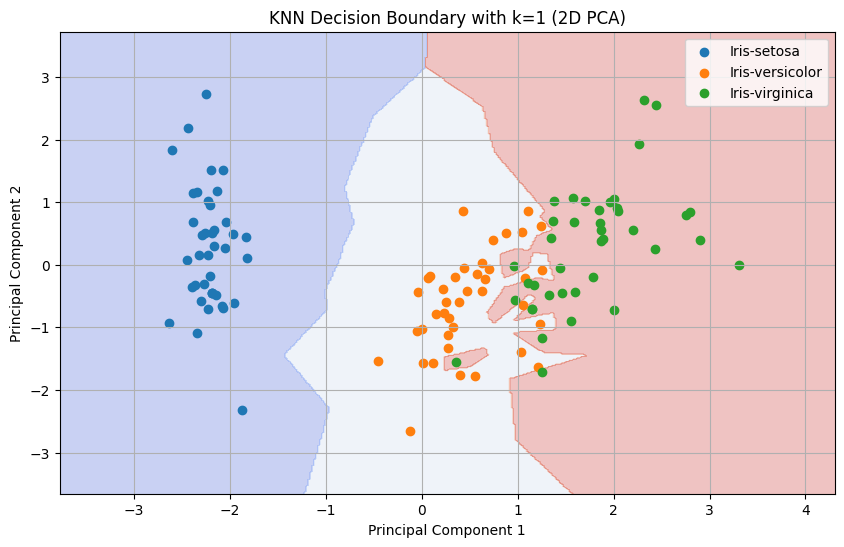

In [25]:
import numpy as np
import matplotlib.pyplot as plt

# Create a mesh grid
h = 0.02  # step size
x_min, x_max = X_pca[:, 0].min() - 1, X_pca[:, 0].max() + 1
y_min, y_max = X_pca[:, 1].min() - 1, X_pca[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

# Predict for each point in the grid
Z = knn_pca.predict(np.c_[xx.ravel(), yy.ravel()])

# Map string labels to integers for plotting
label_map = {label: i for i, label in enumerate(knn_pca.classes_)}
Z_numeric = np.array([label_map[label] for label in Z.ravel()])
Z_numeric = Z_numeric.reshape(xx.shape)


# Plot contour + points
plt.figure(figsize=(10, 6))
plt.contourf(xx, yy, Z_numeric, cmap=plt.cm.coolwarm, alpha=0.3)

# Plot training points
for label in np.unique(y_pca_train):
    idx = y_pca_train == label
    plt.scatter(X_pca_train[idx, 0], X_pca_train[idx, 1], label=label)

plt.title(f"KNN Decision Boundary with k={best_k} (2D PCA)")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend()
plt.grid(True)
plt.show()

In [26]:
# Optional: use plotly to show interactive 2D separation (recommended in Jupyter)
# import plotly.express as px
# fig = px.scatter(x=X_pca[:, 0], y=X_pca[:, 1], color=y)
# fig.show()


In [27]:
# from sklearn.manifold import TSNE
# X_tsne = TSNE(n_components=2).fit_transform(X_normalized)


In [28]:
from sklearn.model_selection import cross_val_score

knn_cv = KNeighborsClassifier(n_neighbors=best_k)
cv_scores = cross_val_score(knn_cv, X_normalized, y, cv=5)
print("Cross-validated Accuracy Scores:", cv_scores)
print("Mean CV Accuracy:", cv_scores.mean())


Cross-validated Accuracy Scores: [0.93333333 0.96666667 0.93333333 0.9        1.        ]
Mean CV Accuracy: 0.9466666666666665


In [29]:
from sklearn.model_selection import GridSearchCV

param_grid = {'n_neighbors': list(range(1, 21))}
grid = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5)
grid.fit(X_train, y_train)
print("Best k:", grid.best_params_)


Best k: {'n_neighbors': 6}


In [31]:
from sklearn.pipeline import Pipeline

pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('knn', KNeighborsClassifier(n_neighbors=best_k))
])
pipeline.fit(X_train, y_train)


Pipeline(steps=[('scaler', StandardScaler()),
                ('knn', KNeighborsClassifier(n_neighbors=1))])